In [88]:
import pandas as pd

crime_raw_data = pd.read_csv('/home/seo/dev_ws/eda/data/2023년.csv', encoding='euc-kr')

crime_raw_data['죄종'] = crime_raw_data['죄종'].replace('강간,추행', '강간')

crime_station = crime_raw_data.pivot_table(
    index="구분", columns=["죄종", "발생검거"], aggfunc="sum"
)

crime_station.columns = crime_station.columns.droplevel([0])

tmp = crime_station.columns.get_level_values(0) + \
    crime_station.columns.get_level_values(1)

crime_station.columns = tmp

crime_station.rename(
    columns={
        "강간검거": "성범죄검거",
        "강간발생": "성범죄발생",
    },
    inplace=True,
)

real_gu = {
    "종로구": ["종로", "혜화"],
    "중구": ["남대문", "중부"],
    "용산구": ["용산"],
    "성동구": ["성동"],
    "광진구": ["광진"],
    "동대문구": ["동대문"],
    "중랑구": ["중랑"],
    "성북구": ["성북", "종암"],
    "강북구": ["강북"],
    "도봉구": ["도봉"],
    "노원구": ["노원"],
    "은평구": ["서부", "은평"],
    "서대문구": ["서대문"],
    "마포구": ["마포"],
    "양천구": ["양천"],
    "강서구": ["강서"],
    "구로구": ["구로"],
    "금천구": ["금천"],
    "영등포구": ["영등포"],
    "동작구": ["동작"],
    "관악구": ["관악"],
    "서초구": ["방배", "서초"],
    "강남구": ["강남", "수서"],
    "송파구": ["송파"],
    "강동구": ["강동"],
}

tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

crime_station["구"] = tmp_gu

crime_gu = crime_station.pivot_table(index="구", aggfunc="sum")

# 구 컬럼을 일반 컬럼으로 변경, 인덱스 제거
crime_gu = crime_gu.reset_index()


crime_gu

,구,강도검거,강도발생,살인검거,살인발생,성범죄검거,성범죄발생,절도검거,절도발생,폭력검거,폭력발생
0,강남구,18,20,11,14,567,678,1284,2480,3112,3571
1,강동구,4,5,6,4,122,144,980,1676,1383,1569
2,강북구,1,1,7,7,102,141,730,917,1302,1431
3,강서구,4,6,2,1,225,300,1243,1794,2070,2195
4,관악구,10,10,17,16,268,328,1166,2013,2035,2402
5,광진구,3,5,2,2,178,238,830,1616,1320,1563
6,구로구,7,7,12,12,144,194,849,1624,1620,1900
7,금천구,4,5,3,4,95,128,629,987,1022,1116
8,노원구,4,3,6,7,131,159,845,1632,1621,1766
9,도봉구,3,4,6,7,72,90,582,995,743,825


In [89]:
# 검거 칼럼들만 합산
sum_arrest = crime_gu[['강도검거', '살인검거', '성범죄검거', '절도검거', '폭력검거']].sum(axis=1)

# 발생 칼럼들만 합산
sum_occurrence = crime_gu[['강도발생', '살인발생', '성범죄발생', '절도발생', '폭력발생']].sum(axis=1)

# 발생 합계를 정규화
crime_gu['정규화'] = sum_occurrence / sum_occurrence.max()

# 새로운 칼럼에 합산값 할당
crime_gu['검거 합계'] = sum_arrest
crime_gu['발생 합계'] = sum_occurrence
crime_gu['검거율'] = (crime_gu['검거 합계'] / crime_gu['발생 합계']) * 100

# 검거율 소수점 첫째 자리까지 반올림
crime_gu['검거율'] = crime_gu['검거율'].round(1)

crime_gu['발생대비_rank'] = crime_gu['정규화'].rank(ascending=False)

crime_gu['발생대비_rank'] = crime_gu['발생대비_rank'].astype(int)



# 결과 확인
crime_gu[['구','검거 합계', '발생 합계', '검거율','정규화', '발생대비_rank']]



,구,검거 합계,발생 합계,검거율,정규화,발생대비_rank
0,강남구,4992,6763,73.8,1.000000,1
1,강동구,2495,3398,73.4,0.502440,13
2,강북구,2142,2497,85.8,0.369215,20
3,강서구,3544,4296,82.5,0.635221,7
4,관악구,3496,4769,73.3,0.705160,4
5,광진구,2333,3424,68.1,0.506284,12
6,구로구,2632,3737,70.4,0.552565,9
7,금천구,1753,2240,78.3,0.331214,23
8,노원구,2607,3567,73.1,0.527429,10
9,도봉구,1406,1921,73.2,0.284046,25


In [90]:
df_gu_area = pd.read_csv("/home/seo/dev_ws/eda/data/gu_area.csv")

df_gu_area = df_gu_area.drop(columns=['자치구별(1)', '2023.1', "2023.2", "2023.3", "2023.4","2023.5"])
df_gu_area = df_gu_area.drop(index = [0, 1, 2])
df_gu_area = df_gu_area.reset_index(drop=True)
df_gu_area = df_gu_area.rename(columns= {"자치구별(2)":"구", "2023": "면적"})

df_gu_area

,구,면적
0,종로구,23.91
1,중구,9.96
2,용산구,21.87
3,성동구,16.82
4,광진구,17.06
5,동대문구,14.22
6,중랑구,18.50
7,성북구,24.58
8,강북구,23.60
9,도봉구,20.65


In [96]:
df_gu_area["면적"] = pd.to_numeric(df_gu_area["면적"], errors='coerce')

crime_gu["면적대비 범죄"]=crime_gu["발생 합계"] / df_gu_area["면적"]

crime_gu["면적대비 범죄"] = crime_gu["면적대비 범죄"].round(1)

crime_gu['면적대비_rank'] = crime_gu['면적대비 범죄'].rank(ascending=False)

crime_gu['면적대비_rank'] = crime_gu['면적대비_rank'].astype(int)

crime_gu[['구','검거 합계', '발생 합계', '검거율','정규화', '발생대비_rank', '면적대비 범죄', '면적대비_rank']]


,구,검거 합계,발생 합계,검거율,정규화,발생대비_rank,면적대비 범죄,면적대비_rank
0,강남구,4992,6763,73.8,1.000000,1,282.9,3
1,강동구,2495,3398,73.4,0.502440,13,341.2,2
2,강북구,2142,2497,85.8,0.369215,20,114.2,15
3,강서구,3544,4296,82.5,0.635221,7,255.4,7
4,관악구,3496,4769,73.3,0.705160,4,279.5,4
5,광진구,2333,3424,68.1,0.506284,12,240.8,8
6,구로구,2632,3737,70.4,0.552565,9,202.0,11
7,금천구,1753,2240,78.3,0.331214,23,91.1,20
8,노원구,2607,3567,73.1,0.527429,10,151.1,12
9,도봉구,1406,1921,73.2,0.284046,25,93.0,19


In [ ]:
crime_gu.to_csv("/home/seo/dev_ws/eda/data/crime_gu.csv", index=False, encoding='utf-8')

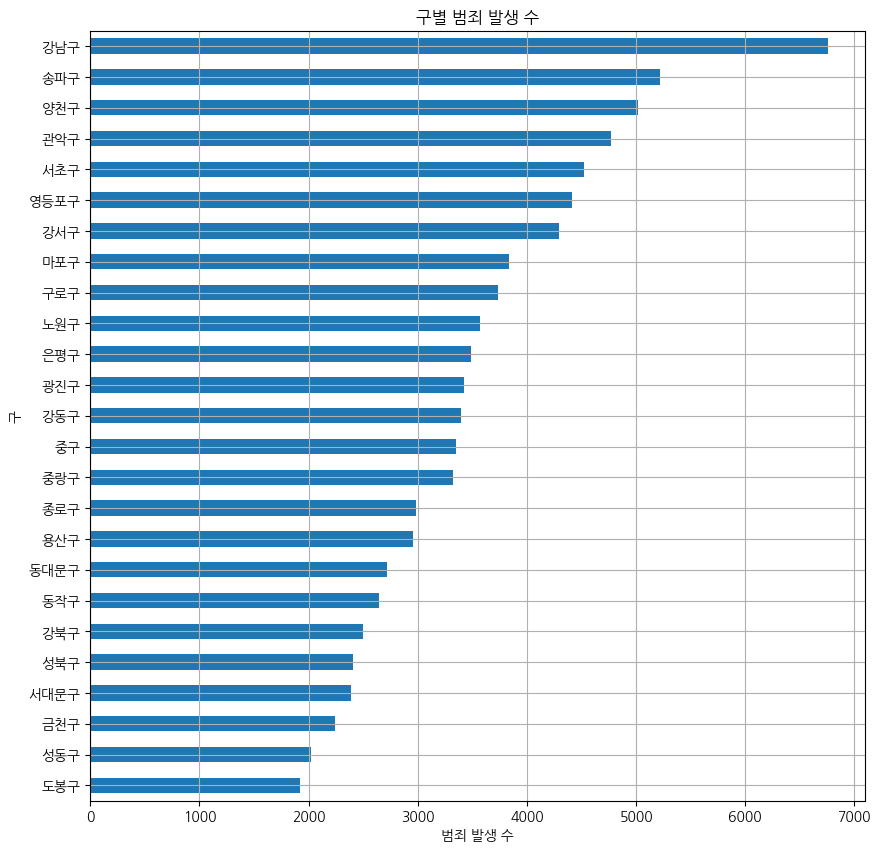

In [92]:
import matplotlib.pyplot as plt

crime_gu = crime_gu.reset_index()

crime_gu.set_index("구")[['강도발생', '살인발생', '성범죄발생', '절도발생', '폭력발생']].sum(axis=1).sort_values().plot(kind="barh", grid=True, figsize=(10, 10))

plt.xlabel("범죄 발생 수")  
plt.ylabel("구")
plt.title("구별 범죄 발생 수")
plt.show()

In [93]:
import json
import folium

geo_path = "/home/seo/dev_ws/eda/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(
    location=[37.5502, 126.982], zoom_start=11, tiles="OpenStreetMap")

folium.Choropleth(
    geo_data=geo_str,  # GeoJSON 데이터
    data=crime_gu,  # 시각화할 데이터
    columns=['구', '정규화'],  # 컬럼 지정: 구와 정규화된 유흥시설 수
    key_on="feature.properties.name",  # GeoJSON에서 구 이름에 맞춰 데이터 연결
    fill_color="PuRd", 
    fill_opacity=0.7,  # 색상의 투명도
    line_opacity=0.2,  # 경계선 투명도
    legend_name="범죄발생 비율",  # 범례 이름
).add_to(my_map)

my_map

In [94]:
print(crime_gu.columns)

Index(['index', '구', '강도검거', '강도발생', '살인검거', '살인발생', '성범죄검거', '성범죄발생', '절도검거',
       '절도발생', '폭력검거', '폭력발생', '정규화', '검거 합계', '발생 합계', '검거율', '발생대비_rank',
       '면적대비 범죄', '면적대비_rank'],
      dtype='object')


In [ ]:
# 구 컬럼을 일반 컬럼으로 변경, 인덱스 제거
crime_gu = crime_gu.reset_index(drop=True)

# 원하는 칼럼을 명시적으로 지정
crime_columns = ["강도발생", "살인발생", "성범죄발생", "절도발생", "폭력발생" ]


# 발생칼럼을 구별로 정리 (melt 사용)
df_crime = crime_gu[["구"] + crime_columns].melt(id_vars=["구"], 
                                                  value_vars=crime_columns, 
                                                  var_name="crime_type", 
                                                  value_name="crime_count")
df_crime['crime_type'] = df_crime['crime_type'].str.replace('발생', '', regex=False)
# 결과 출력
df_crime.head(50)


,구,crime_type,crime_count
0,강남구,강도,20
1,강동구,강도,5
2,강북구,강도,1
3,강서구,강도,6
4,관악구,강도,10
5,광진구,강도,5
6,구로구,강도,7
7,금천구,강도,5
8,노원구,강도,3
9,도봉구,강도,4


In [69]:
import mysql.connector

# MySQL 연결
conn = mysql.connector.connect(
    host='database-1.cbwuowec22t2.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='team2',
    password="1234",
    database='eda_project'
)

cursor = conn.cursor(buffered=True)

# 구 ID를 가져오는 함수
def get_gu_id(gu):
    cursor.execute('SELECT gu_id FROM gu WHERE gu_name = %s', (gu,))
    gu_id = cursor.fetchone()
    return gu_id[0] if gu_id else None

# 구별로 데이터를 삽입
for _, row in df_crime.iterrows():
    gu_id = get_gu_id(row["구"])
    
    if gu_id:  # 구 ID가 존재하는 경우에만 삽입
        cursor.execute("""
            INSERT INTO crime (crime_type, crime_count, gu_id)
            VALUES (%s, %s, %s)
        """, (row["crime_type"], row["crime_count"], gu_id))

conn.commit()
conn.close()
